In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('imdb_labelled.txt', header=None, sep='\t')
pd.set_option('display.max_row', 100)
df.columns = ['Message', 'Negative Review']
df['Negative Review'] = (df['Negative Review'] == 0)
df.head(20)

,Message,Negative Review
0,"A very, very, very slow-moving, aimless movie ...",True
1,Not sure who was more lost - the flat characte...,True
2,Attempting artiness with black & white and cle...,True
3,Very little music or anything to speak of.,True
4,The best scene in the movie was when Gerardo i...,False
5,"The rest of the movie lacks art, charm, meanin...",True
6,Wasted two hours.,True
7,Saw the movie today and thought it was a good ...,False
8,A bit predictable.,True
9,Loved the casting of Jimmy Buffet as the scien...,False


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
Message            748 non-null object
Negative Review    748 non-null bool
dtypes: bool(1), object(1)
memory usage: 6.7+ KB


In [3]:
neg_keywords = ['bad', 'awful','stupid', 'terrible', 'worst', 'mess', 'weak', 'intelligence']

for key in neg_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.Message.str.contains(
        ' ' + str(key),
        case=False
    )
df

,Message,Negative Review,bad,awful,stupid,terrible,worst,mess,weak,intelligence
0,"A very, very, very slow-moving, aimless movie ...",True,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,True,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,True,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,True,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,True,False,False,False,False,False,False,False,False
744,"Unfortunately, any virtue in this film's produ...",True,False,False,False,False,False,False,False,False
745,"In a word, it is embarrassing.",True,False,False,False,False,False,False,False,False
746,Exceptionally bad!,True,True,False,False,False,False,False,False,False


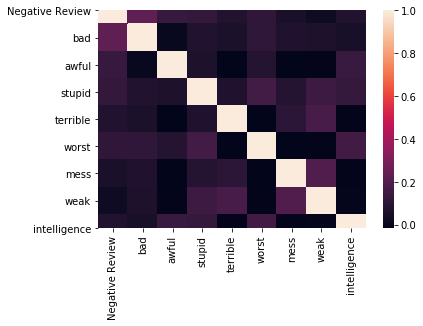

In [4]:
sns.heatmap(df.corr())

In [5]:
df.corr()

,Negative Review,bad,awful,stupid,terrible,worst,mess,weak,intelligence
Negative Review,1.000000,0.236360,0.131853,0.122872,0.073616,0.113956,0.055352,0.023200,0.075715
bad,0.236360,1.000000,0.005497,0.075825,0.057485,0.111352,0.071434,0.064030,0.050375
awful,0.131853,0.005497,1.000000,0.060882,-0.014864,0.083504,-0.013276,-0.008103,0.136538
stupid,0.122872,0.075825,0.060882,1.000000,0.069817,0.165716,0.081543,0.147317,0.125135
terrible,0.073616,0.057485,-0.014864,0.069817,1.000000,-0.012846,0.101062,0.176790,-0.008535
worst,0.113956,0.111352,0.083504,0.165716,-0.012846,1.000000,-0.011474,-0.007003,0.160037
mess,0.055352,0.071434,-0.013276,0.081543,0.101062,-0.011474,1.000000,0.199039,-0.007624
weak,0.023200,0.064030,-0.008103,0.147317,0.176790,-0.007003,0.199039,1.000000,-0.004653
intelligence,0.075715,0.050375,0.136538,0.125135,-0.008535,0.160037,-0.007624,-0.004653,1.000000


In [6]:
data = df[neg_keywords]
target = df['Negative Review']

In [7]:
#Bernoulli for boolean data
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 276


In [8]:
#Testing it on one of the other datasets
df1 = pd.read_csv('yelp_labelled.txt', header=None, sep='\t')
df1.columns = ['Message', 'Negative Review']
df1['Negative Review'] = (df1['Negative Review'] == 0)
df1.head(20)

,Message,Negative Review
0,Wow... Loved this place.,False
1,Crust is not good.,True
2,Not tasty and the texture was just nasty.,True
3,Stopped by during the late May bank holiday of...,False
4,The selection on the menu was great and so wer...,False
5,Now I am getting angry and I want my damn pho.,True
6,Honeslty it didn't taste THAT fresh.),True
7,The potatoes were like rubber and you could te...,True
8,The fries were great too.,False
9,A great touch.,False


In [9]:
for key in neg_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df1[str(key)] = df1.Message.str.contains(
        ' ' + str(key),
        case=False
    )
df1

,Message,Negative Review,bad,awful,stupid,terrible,worst,mess,weak,intelligence
0,Wow... Loved this place.,False,False,False,False,False,False,False,False,False
1,Crust is not good.,True,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,True,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,True,False,False,False,False,False,False,False,False
996,Appetite instantly gone.,True,False,False,False,False,False,False,False,False
997,Overall I was not impressed and would not go b...,True,False,False,False,False,False,False,False,False
998,"The whole experience was underwhelming, and I ...",True,False,False,False,False,False,False,False,False


In [10]:
target = df1['Negative Review']
data = df1[neg_keywords]

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 463


The ratio is worse, since word choice in bad movie reviews will be different than bad food reviews.

For feature engineering when working with the original file from the IMBD reviews, I also considered things like length of review, punctuation used, etc, but both bad and good reviews had little differences with these. I tried adding more words to the negative keywords, but I didn't get a better mislabeled ratio.